In [36]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, permutations, zip_longest
import random

In [2]:
color_data = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'forestgreen': 4,
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
    'crimson': 9, 
    'black': 10,
    'dodgerblue': 11,
    'deeppink': 12,
    'teal': 13,
    'olive': 14,
    'fuchsia': 15,
    'khaki': 16
    }

In [3]:
c_batch_1 = {
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
}

c_batch_2 = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'crimson': 9, 
}

In [40]:
def permutated_colors(color_batch: dict, r: int = None) -> list[list]:
    if not r:
        r = len(color_batch)
    
    c_1 = list(color_batch.keys())
    
    color_combos_1 = list(permutations(c_1, r=r))
    random.shuffle(color_combos_1)

    return [list(el) for el in color_combos_1]


def batch_permutation_union(perm_colors_1: list[list], perm_colors_2: list[list]) -> list[list]:
    final_permutation_table = []
    for c_1 in perm_colors_1:
        for c_2 in perm_colors_2:
            color_row = [
                elem for pair in zip_longest(c_1, c_2)
                for elem in pair if elem is not None
            ]
            # color_row = c_1 + c_2
            final_permutation_table.append(color_row)
    
    random.shuffle(final_permutation_table)
    
    return final_permutation_table

In [41]:
c_1 = permutated_colors(c_batch_1, 4)
c_2 = permutated_colors(c_batch_2, 4)

c_1_check = sorted(['-'.join(el) for el in c_1])
c_2_check = sorted(['-'.join(el) for el in c_2])

a = len(c_1_check) == len(set(c_1_check))
b = len(c_2_check) == len(set(c_2_check))
print(a, b)

for idx, el in enumerate(c_2_check):
    print(f'{idx}. {el}')

True True
0. crimson-darkorange-maroon-yellow
1. crimson-darkorange-yellow-maroon
2. crimson-maroon-darkorange-yellow
3. crimson-maroon-yellow-darkorange
4. crimson-yellow-darkorange-maroon
5. crimson-yellow-maroon-darkorange
6. darkorange-crimson-maroon-yellow
7. darkorange-crimson-yellow-maroon
8. darkorange-maroon-crimson-yellow
9. darkorange-maroon-yellow-crimson
10. darkorange-yellow-crimson-maroon
11. darkorange-yellow-maroon-crimson
12. maroon-crimson-darkorange-yellow
13. maroon-crimson-yellow-darkorange
14. maroon-darkorange-crimson-yellow
15. maroon-darkorange-yellow-crimson
16. maroon-yellow-crimson-darkorange
17. maroon-yellow-darkorange-crimson
18. yellow-crimson-darkorange-maroon
19. yellow-crimson-maroon-darkorange
20. yellow-darkorange-crimson-maroon
21. yellow-darkorange-maroon-crimson
22. yellow-maroon-crimson-darkorange
23. yellow-maroon-darkorange-crimson


In [42]:
final_colors = batch_permutation_union(c_1, c_2)

colors = ['-'.join(el) for el in final_colors]

a = len(colors) == len(set(colors))
print(a)

for idx, el in enumerate(sorted(final_colors), start=1):
    print(f'{idx}. {el}')


True
1. ['blue', 'crimson', 'cyan', 'darkorange', 'darkviolet', 'maroon', 'deepskyblue', 'yellow']
2. ['blue', 'crimson', 'cyan', 'darkorange', 'darkviolet', 'yellow', 'deepskyblue', 'maroon']
3. ['blue', 'crimson', 'cyan', 'darkorange', 'deepskyblue', 'maroon', 'darkviolet', 'yellow']
4. ['blue', 'crimson', 'cyan', 'darkorange', 'deepskyblue', 'yellow', 'darkviolet', 'maroon']
5. ['blue', 'crimson', 'cyan', 'maroon', 'darkviolet', 'darkorange', 'deepskyblue', 'yellow']
6. ['blue', 'crimson', 'cyan', 'maroon', 'darkviolet', 'yellow', 'deepskyblue', 'darkorange']
7. ['blue', 'crimson', 'cyan', 'maroon', 'deepskyblue', 'darkorange', 'darkviolet', 'yellow']
8. ['blue', 'crimson', 'cyan', 'maroon', 'deepskyblue', 'yellow', 'darkviolet', 'darkorange']
9. ['blue', 'crimson', 'cyan', 'yellow', 'darkviolet', 'darkorange', 'deepskyblue', 'maroon']
10. ['blue', 'crimson', 'cyan', 'yellow', 'darkviolet', 'maroon', 'deepskyblue', 'darkorange']
11. ['blue', 'crimson', 'cyan', 'yellow', 'deepskyblue

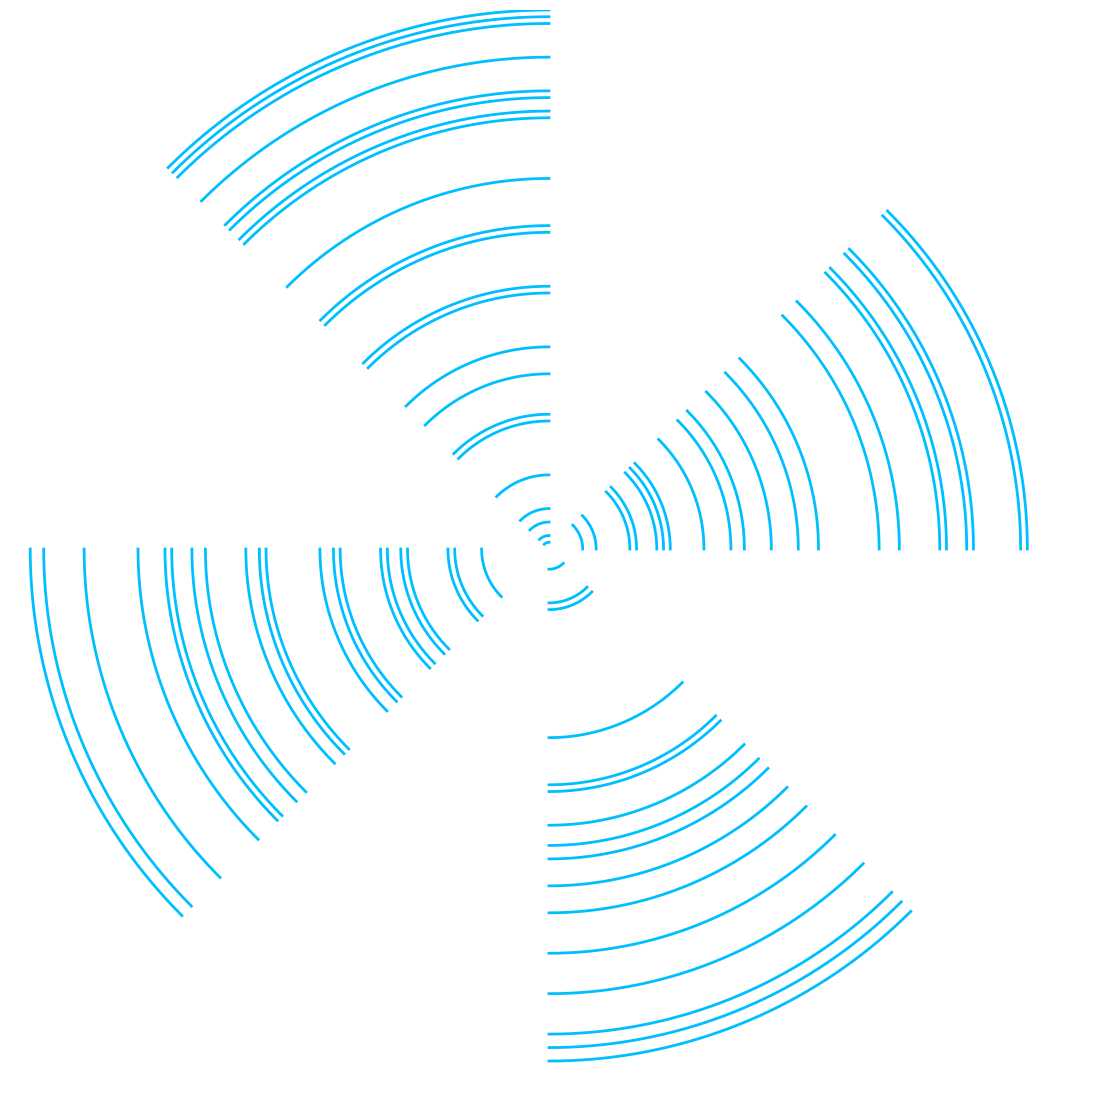

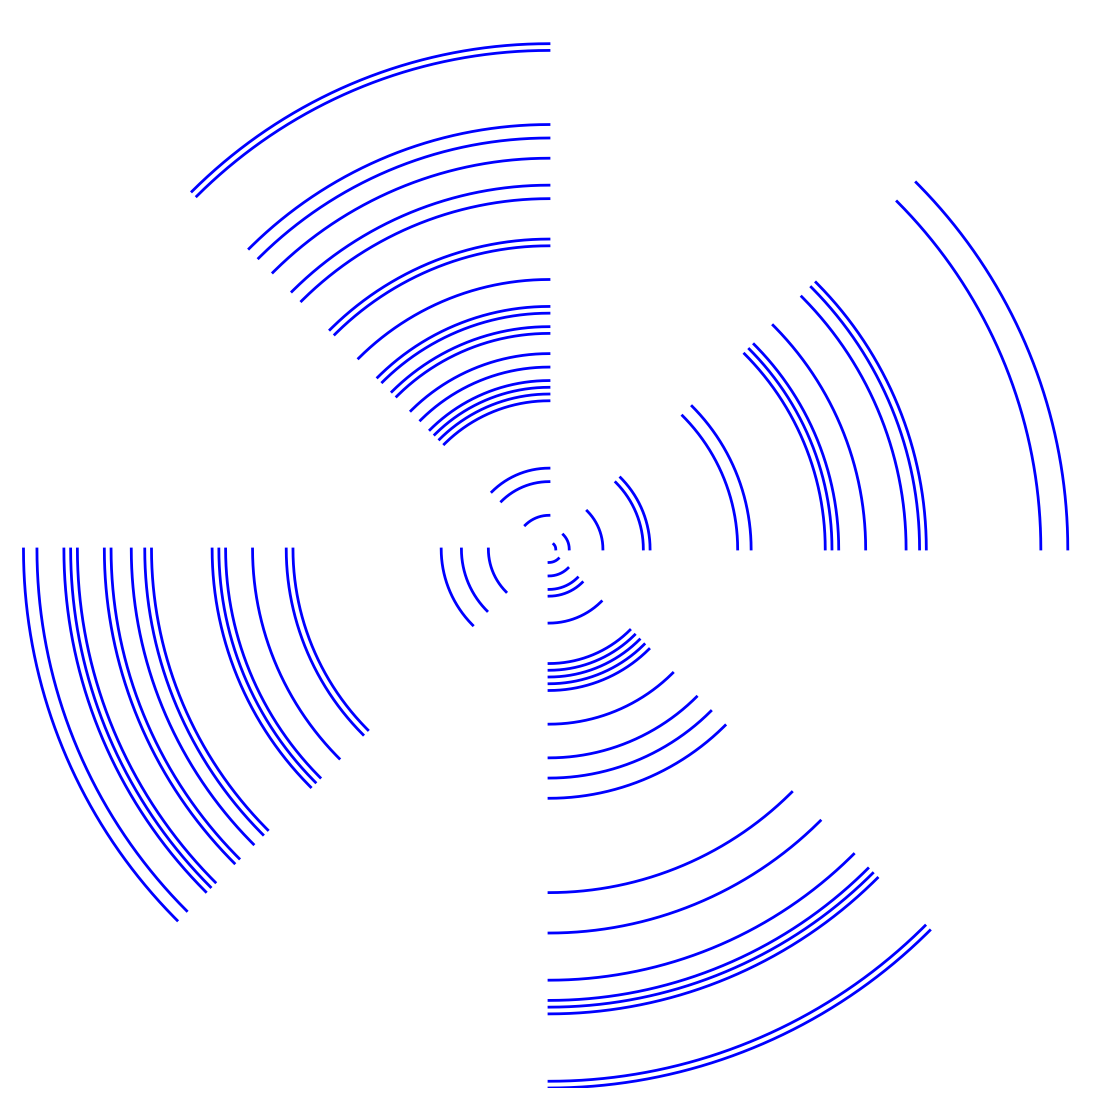

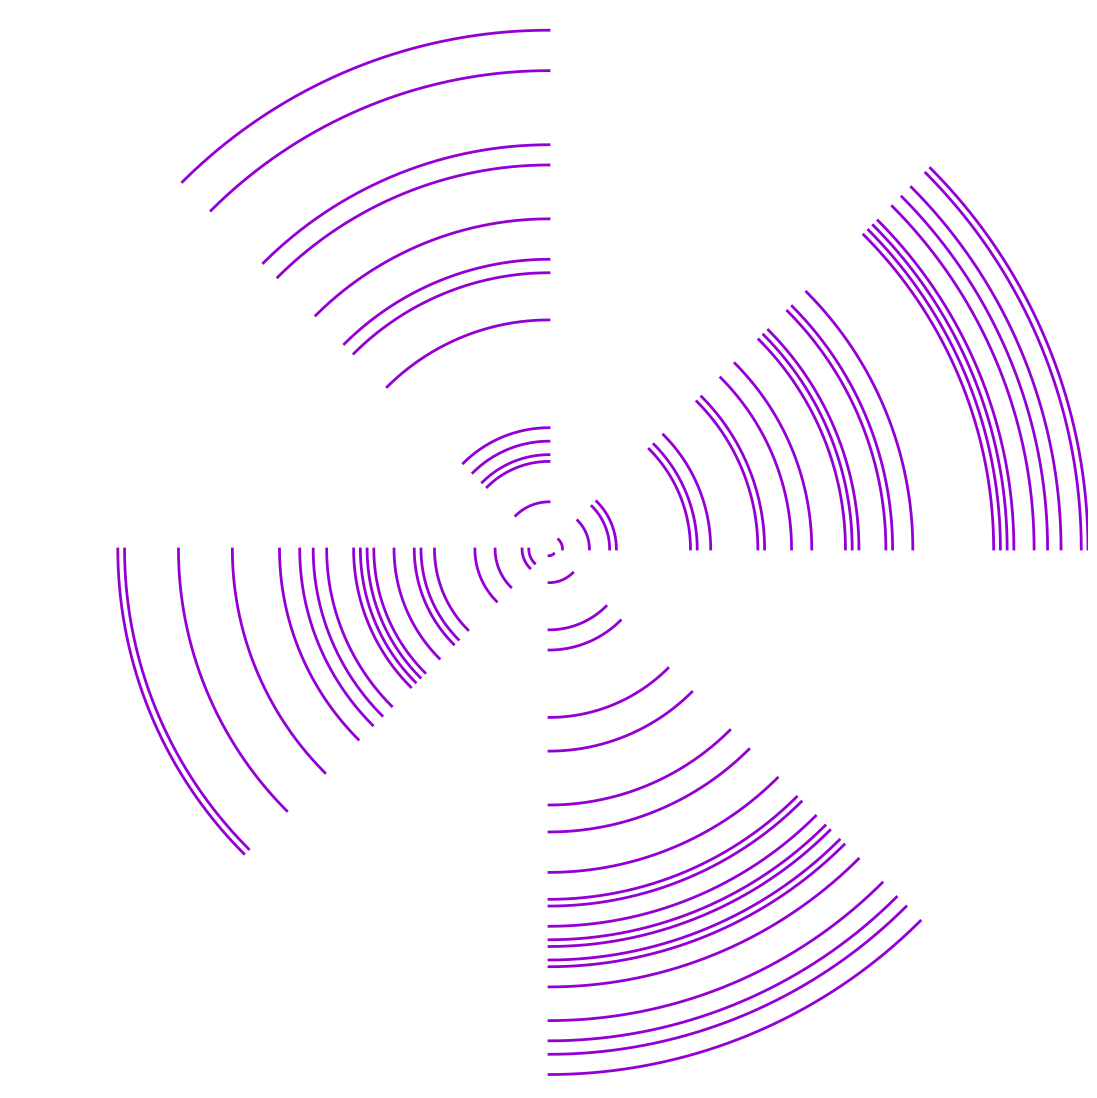

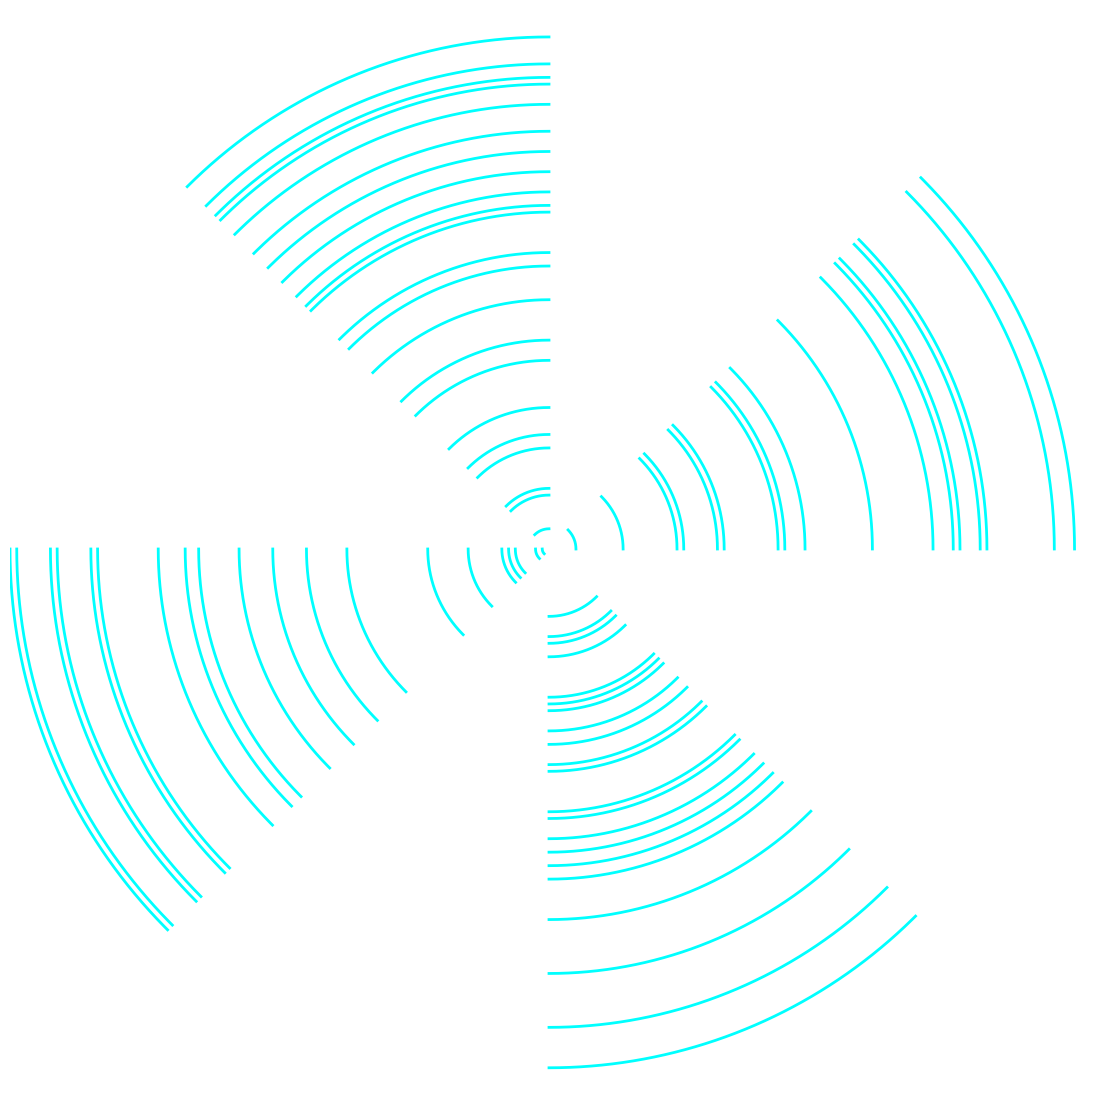

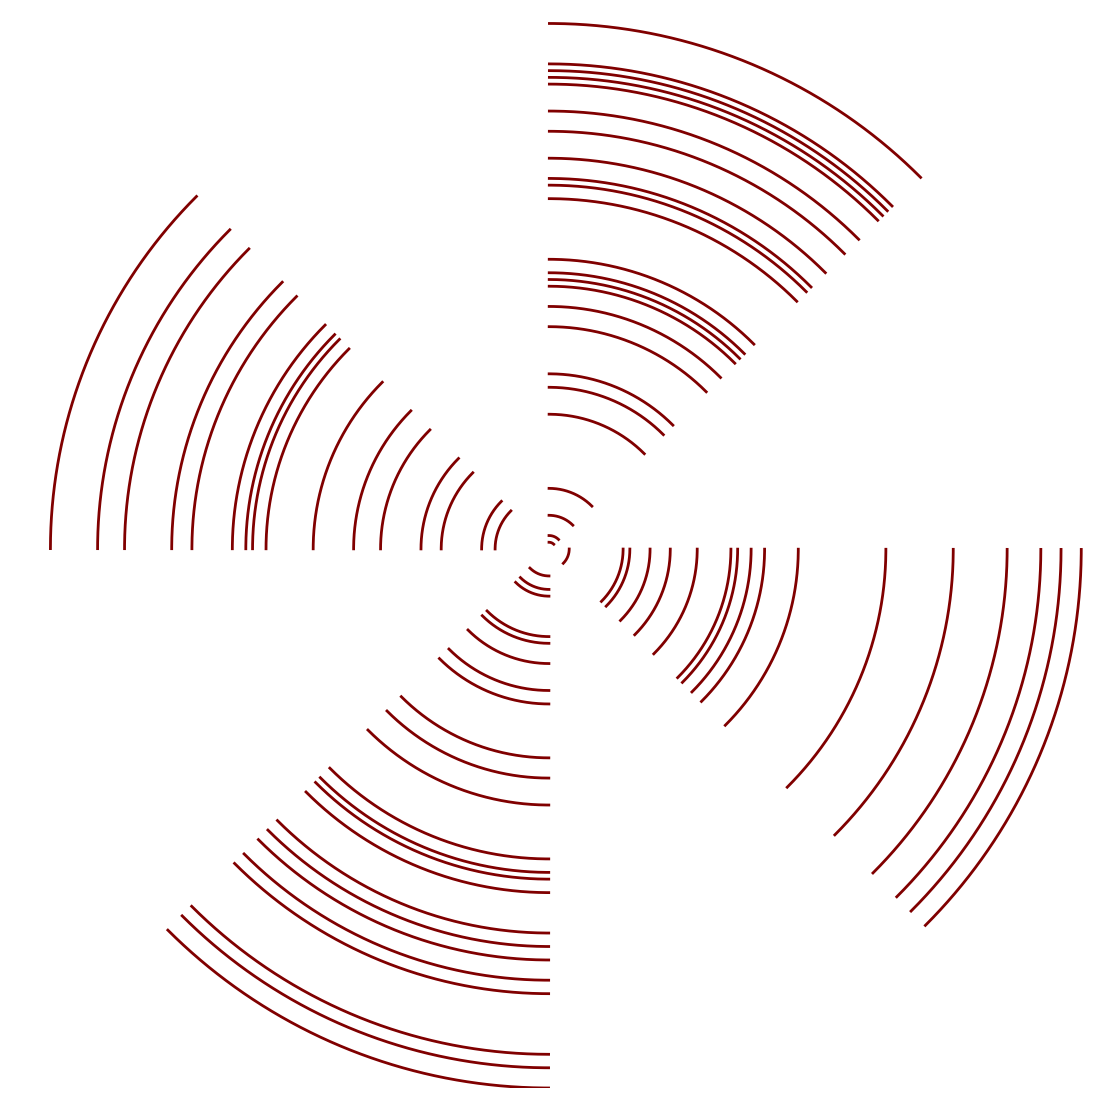

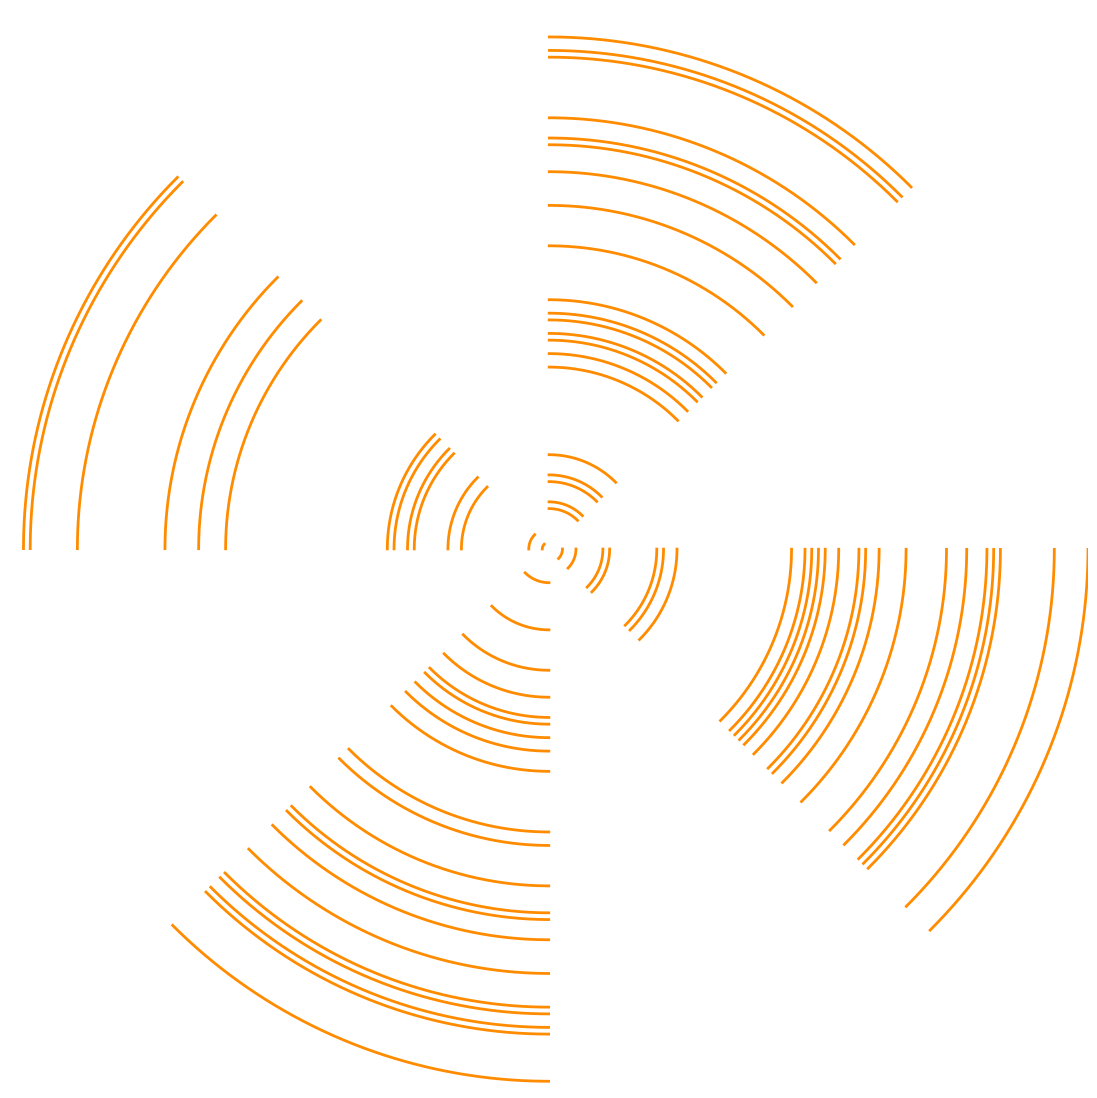

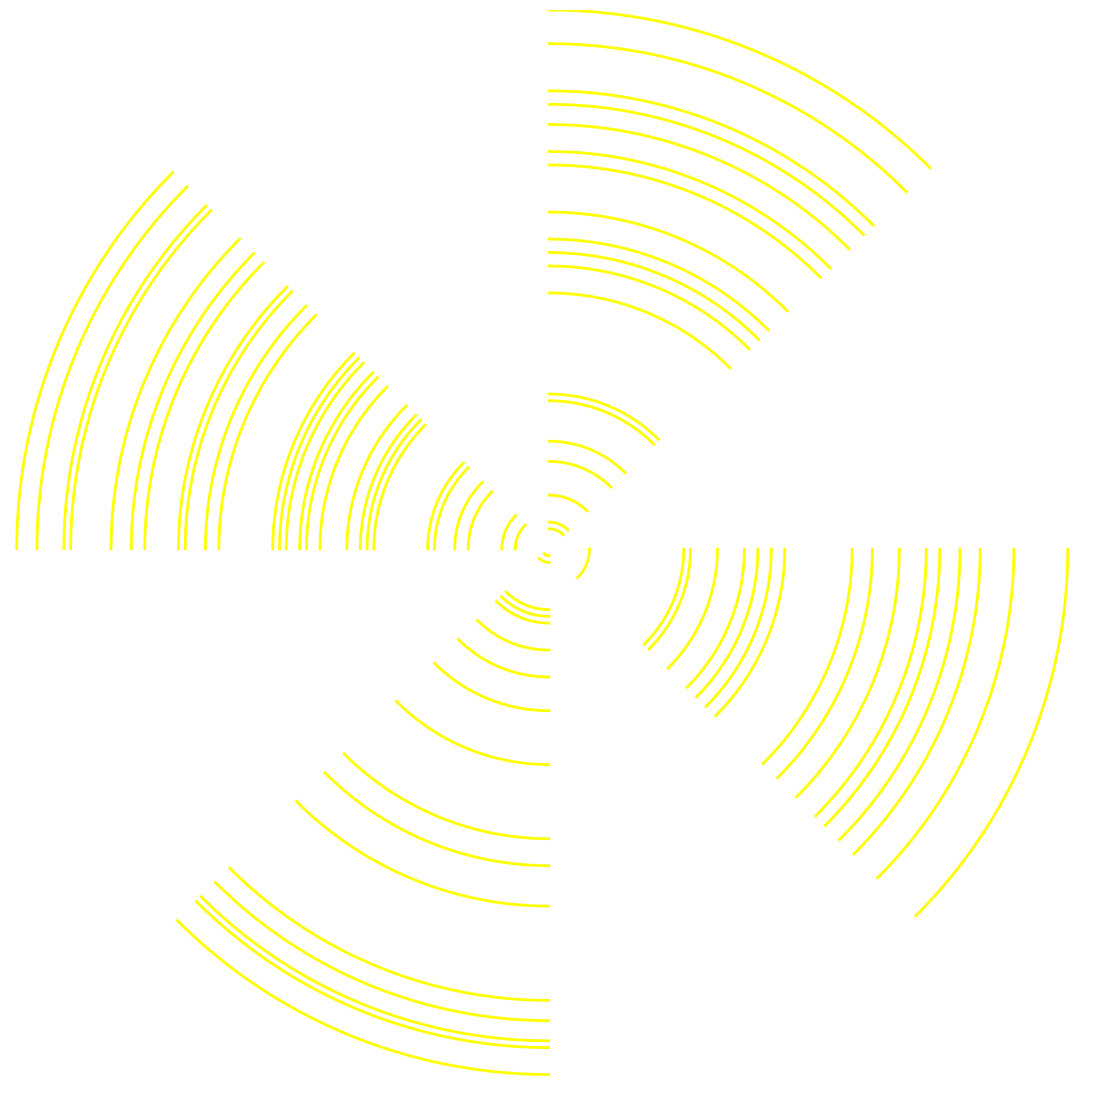

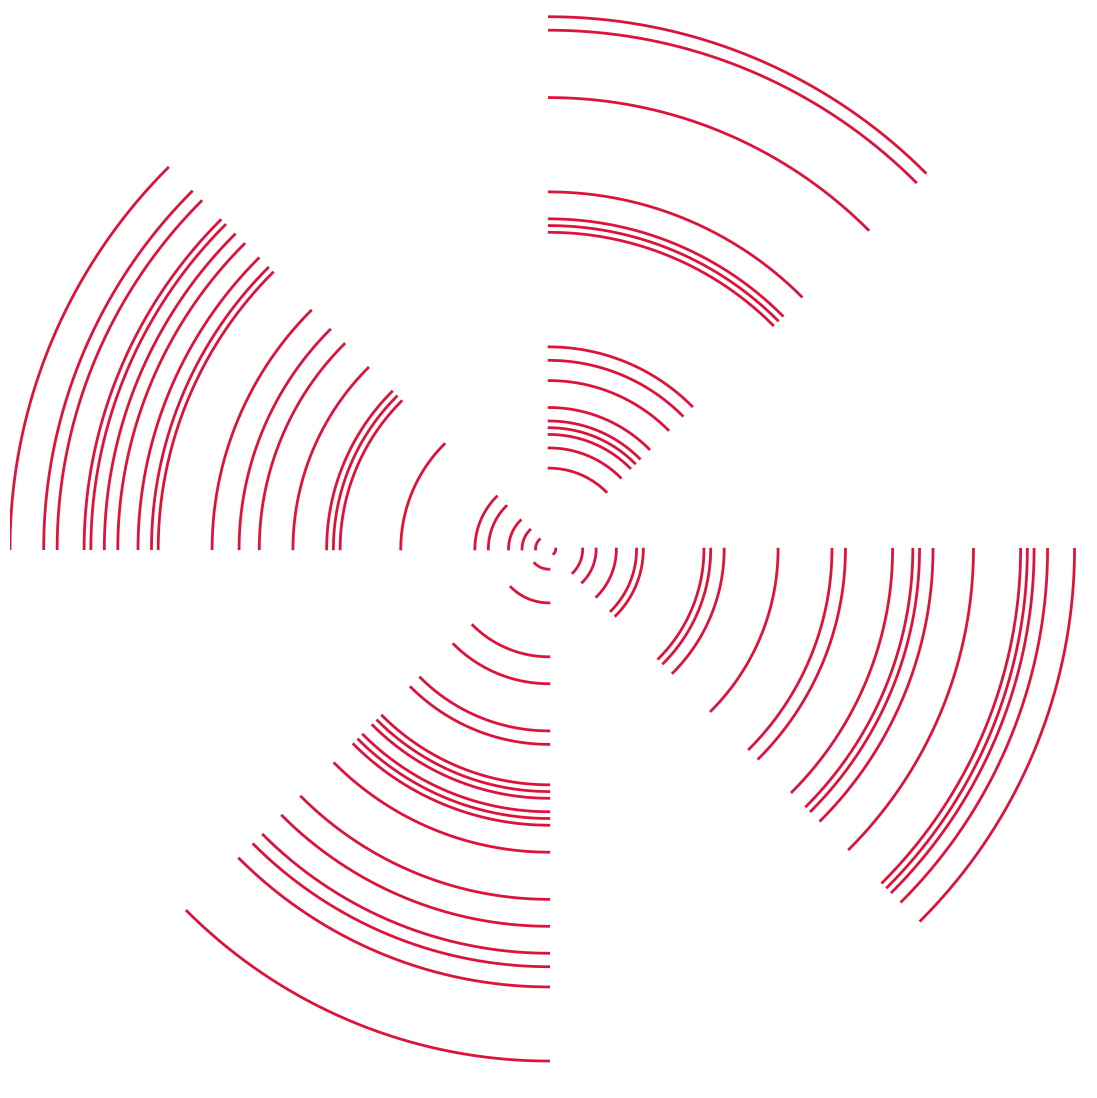

In [47]:
c_batch_1 = {
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
}

c_batch_2 = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'crimson': 9, 
}

colors = list(c_batch_1.keys()) + list(c_batch_2.keys())
c_1 = permutated_colors(c_batch_1, 4)
c_2 = permutated_colors(c_batch_2, 4)

color_combos = batch_permutation_union(c_1, c_2)

# Quarters of Circles
split_circle_parts = 8
theta_delta = 2*np.pi / split_circle_parts

color_thetas = []

for t_part in range(split_circle_parts):
    t_angles = np.linspace(t_part*theta_delta, (t_part+1)*theta_delta, 1000, endpoint=False)
    color_thetas.append(t_angles)

init_radius=.1
radius = .1
radius_delta = .1

for color in colors:
    for idx, col_combo in enumerate(color_combos[:80]):
        if color not in col_combo:
            radius+=radius_delta
            continue
        color_idx = col_combo.index(color)
        plt.plot(np.cos(color_thetas[color_idx])*radius, np.sin(color_thetas[color_idx])*radius, color=color, linewidth=2)
        radius+=radius_delta
    
    radius = init_radius


    plt.axis('off')
    plt.axis([-8, 8, -8, 8])
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(14, 14)
    plt.savefig(f'color_target_12_{color}.svg')
    plt.show()



In [38]:
list1 = ['a', 'b', 'c']
list2 = ['d', 'e', 'f','g']

list1 = ['a', 'b', 'c', 'g']
list2 = ['d', 'e', 'f']

final_list = [elem for pair in zip_longest(list1, list2) for elem in pair if elem is not None]
print(final_list)

['a', 'd', 'b', 'e', 'c', 'f', 'g']


Number of color combinations: 840
Max r for square: 14.3
Half width: 10.11162697096763. Full width: 20.22325394193526
Num big squares: 36. Num all squares: 468
X-full width: 129.03952365161155. Y-full with: 129.03952365161155
Work area cm: 18. cm in one point: 0.1394921454344287. Full width in cm: 2.8209850800258165
Estimated pen width cm: 0.1084994261548391


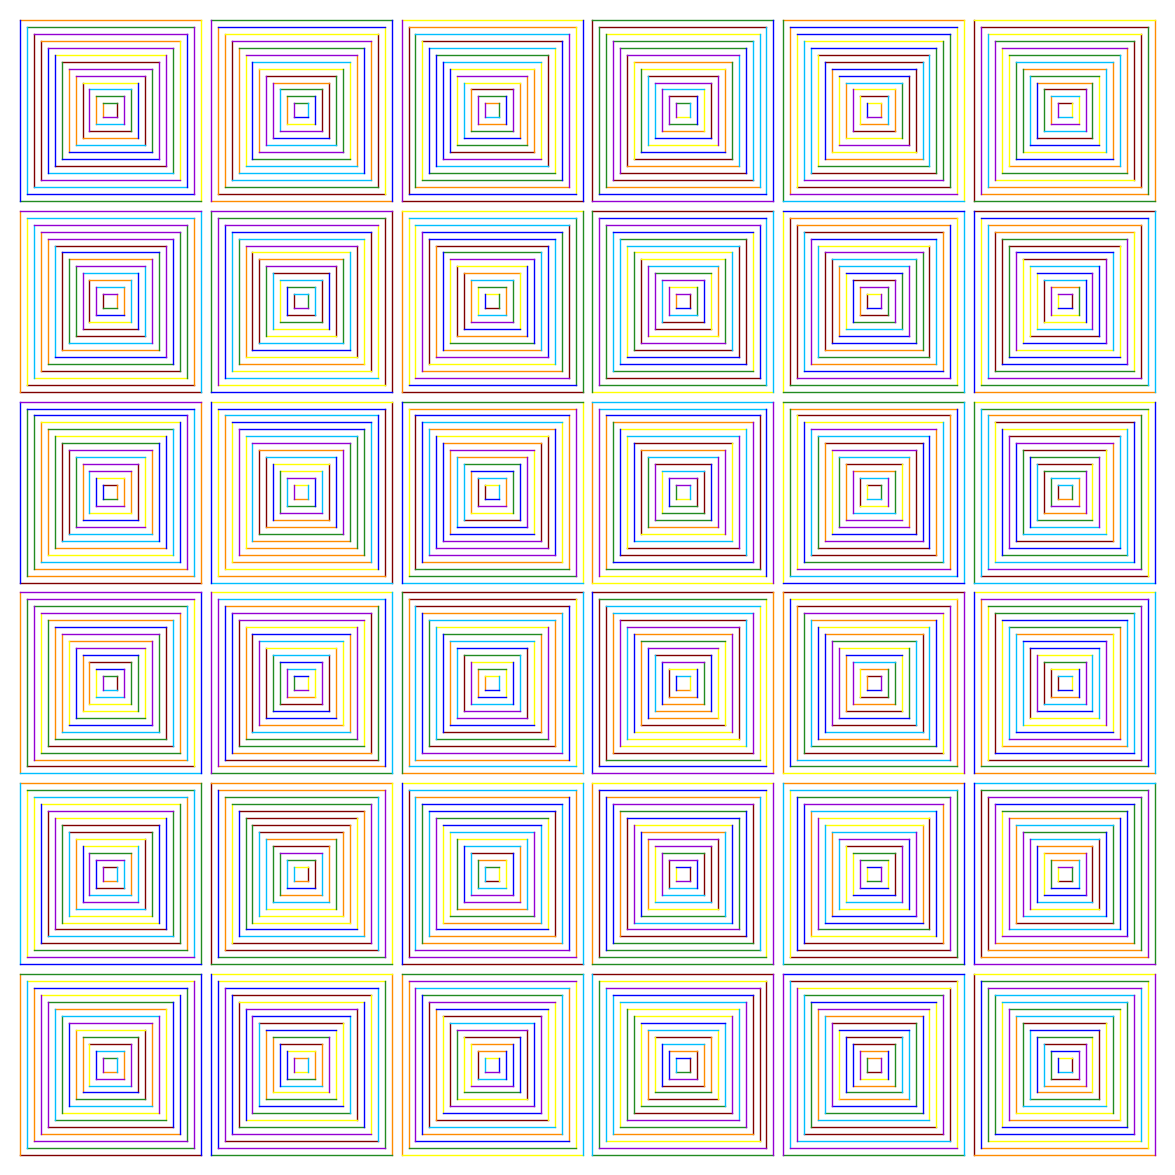

In [49]:
from itertools import product, pairwise, permutations

# Working first with colors and permuations of colors
color_data = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'forestgreen': 4,
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
    'crimson': 9, 
    'black': 10,
    'dodgerblue': 11,
    'deeppink': 12,
    'teal': 13,
    'olive': 14,
    'fuchsia': 15,
    'khaki': 16
    }

num_colors = 7
colors = list(color_data.keys())[:num_colors]
k = 4 # nCk

color_combos = list(permutations(colors, r=k))
random.shuffle(color_combos)

color_combos = [list(el) for el in color_combos]
for el in color_combos:
    random.shuffle(el)

num_color_combos = len(color_combos)

print(f'Number of color combinations: {num_color_combos}')


def sqr_coordinates(r = 1):
    '''r is a half diagonal of a square. Based on that we can calculate all the coordinates to build the square'''
    coord_options = [-r / np.sqrt(2), r / np.sqrt(2)]
    line_coords_raw = list(product(coord_options, repeat=2))
    sorted_coords = sorted(line_coords_raw, key=lambda item: (item[0], -item[1]) if item[0] < 0 else item)
    sorted_coords.append(sorted_coords[0]) # connecting the first and last dots

    return list(pairwise(sorted_coords)) # pair of coordinates

def convert_to_plot_coords(standard_coords: list[tuple]) -> list[list[list]]:
    '''Convert [(x1,y1), (x2,y2)] to [[x1,x2], [y1,y2]] type'''
    final_coords = []
    for coord in standard_coords:
        x_coords = [el[0] for el in coord]
        y_coords = [el[1] for el in coord]
        final_coords.append([x_coords, y_coords])
    
    return final_coords

def shift_coords(plot_coords: list[list[list]], x_shift, y_shift):
    '''Shifting prepared for plot coords by x and y'''
    final_coords = []
    for coord in plot_coords:
        x_coords = [el+x_shift for el in coord[0]]
        y_coords = [el+y_shift for el in coord[1]]
        final_coords.append([x_coords, y_coords])
    
    return final_coords

num_rows = 6
num_cols = 6
num_big_squares = num_rows * num_cols

row_col_idx = [(row, col) for row in range(num_rows) for col in range(num_cols)]

r_init = 1
r_fact = 1.1
num_internal_sqr = 13
num_all_squares = num_internal_sqr * num_big_squares

max_r = r_init*r_fact*num_internal_sqr
half_width  = max_r / np.sqrt(2)
full_width = half_width * 2
xy_delta = r_init*r_fact

x_lim_neg = -half_width-xy_delta
x_lim_pos = full_width*(num_cols-1)+half_width+xy_delta*num_cols
x_full_width = x_lim_pos - x_lim_neg

y_lim_neg = -half_width-xy_delta
y_lim_pos = full_width*(num_rows-1)+half_width+xy_delta*num_cols
y_full_width = y_lim_pos - y_lim_neg

print(f'Max r for square: {max_r}')
print(f'Half width: {half_width}. Full width: {full_width}')
print(f'Num big squares: {num_big_squares}. Num all squares: {num_all_squares}')
print(f'X-full width: {x_full_width}. Y-full with: {y_full_width}')

canvas_real_widith_cm = 20
xy_margin_cm = 1
work_area_cm = canvas_real_widith_cm - 2*xy_margin_cm

point_ratio_cm_to_pt = work_area_cm / x_full_width

one_square_cm = full_width * point_ratio_cm_to_pt
one_square_num_pen_lines = 2 * num_internal_sqr
estimated_pen_width_cm = one_square_cm / one_square_num_pen_lines
# one_square_blank_space_cm = one_square_cm - one_square_pen_width 
print(f'Work area cm: {work_area_cm}. cm in one point: {point_ratio_cm_to_pt}. Full width in cm: {one_square_cm}')
print(f'Estimated pen width cm: {estimated_pen_width_cm}')
for color in colors:
    for el_idx, grid in enumerate(row_col_idx):
        for sqr_idx in range(1, num_internal_sqr+1):
            full_idx = el_idx * num_internal_sqr + sqr_idx - 1
            color_combo = color_combos[full_idx]
            if color not in color_combo:
                continue
            index_of_color = color_combo.index(color)
            r = r_init*r_fact*sqr_idx
            a = sqr_coordinates(r=r)
            adapted_coords = convert_to_plot_coords(a)
            shifted_coords = shift_coords(
                adapted_coords,
                x_shift=grid[0]*(full_width+xy_delta),
                y_shift=grid[1]*(full_width+xy_delta)
            )
            side_coords = shifted_coords[index_of_color]
            plt.plot(side_coords[0], side_coords[1], color=color, linewidth=1)
plt.axis('off')
plt.axis([x_lim_neg, x_lim_pos, y_lim_neg, y_lim_pos])
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(15, 15)
plt.savefig(f'sqr_color/{color}_sqr.svg')
plt.show()

In [ ]:
color_data = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'forestgreen': 4,
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
    'crimson': 9, 
    'black': 10,
    'dodgerblue': 11,
    'deeppink': 12,
    'teal': 13,
    'olive': 14,
    'fuchsia': 15,
    'khaki': 16
    }
c_batch_1 = {
    'deepskyblue': 5,
    'blue': 6,
    'darkviolet': 7,
    'cyan': 8,
}

c_batch_2 = {
    'maroon': 1,
    'darkorange': 2,
    'yellow': 3,
    'crimson': 9, 
}